In [112]:
# ======================Import required library==========================
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
import joblib

In [113]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ozors\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ozors\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ozors\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Dataset Importation and EDA

In [114]:
 pwd

'C:\\Users\\ozors\\OneDrive - University of Derby\\Big Data\\Assigment\\Res\\PROJECT WORK'

In [115]:
# =============Import mental health dataset===================
mental_text = pd.read_csv("mental_health.csv")

In [116]:
mental_text.head(10)

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
5,hey rredflag sure right place post this goes ...,1
6,feel like someone needs hear tonight feeling r...,0
7,deserve liveif died right noone would carei re...,1
8,feels good ive set dateim killing friday nice ...,1
9,live guiltok made stupid random choice its ge...,1


In [117]:
# =================Dataset Analysis=================
mental_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


In [118]:
mental_text.shape

(27977, 2)

In [119]:
mental_text.describe()

,label
count,27977.000000
mean,0.494621
std,0.499980
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<Axes: xlabel='label', ylabel='count'>

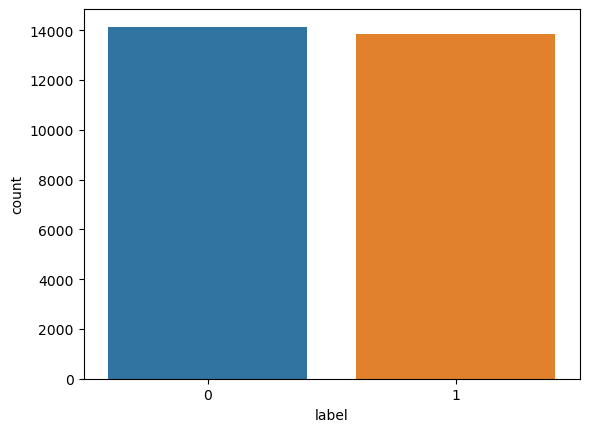

In [120]:
# ==================Visualization of the column==============
sns.countplot(x = mental_text['label'], data=mental_text)

### Generate Wordcloud For The Data

In [121]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [122]:
###import wordcloud##
from wordcloud import WordCloud

In [123]:
text_corpus = ' '.join(mental_text['text'].values)

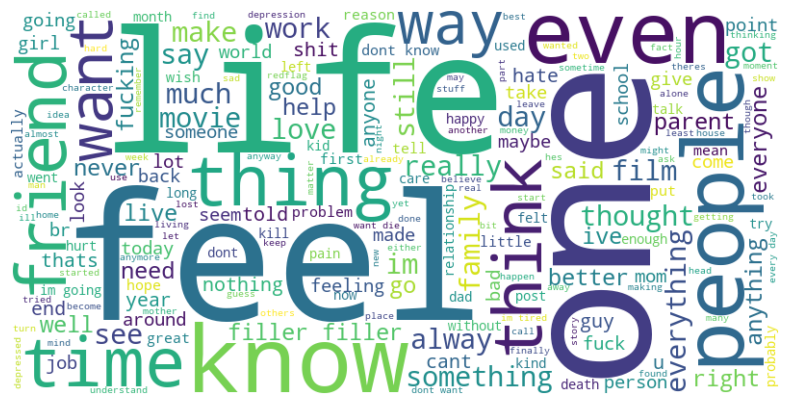

In [124]:
#####create wordcloud for all the text in the dataset####
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

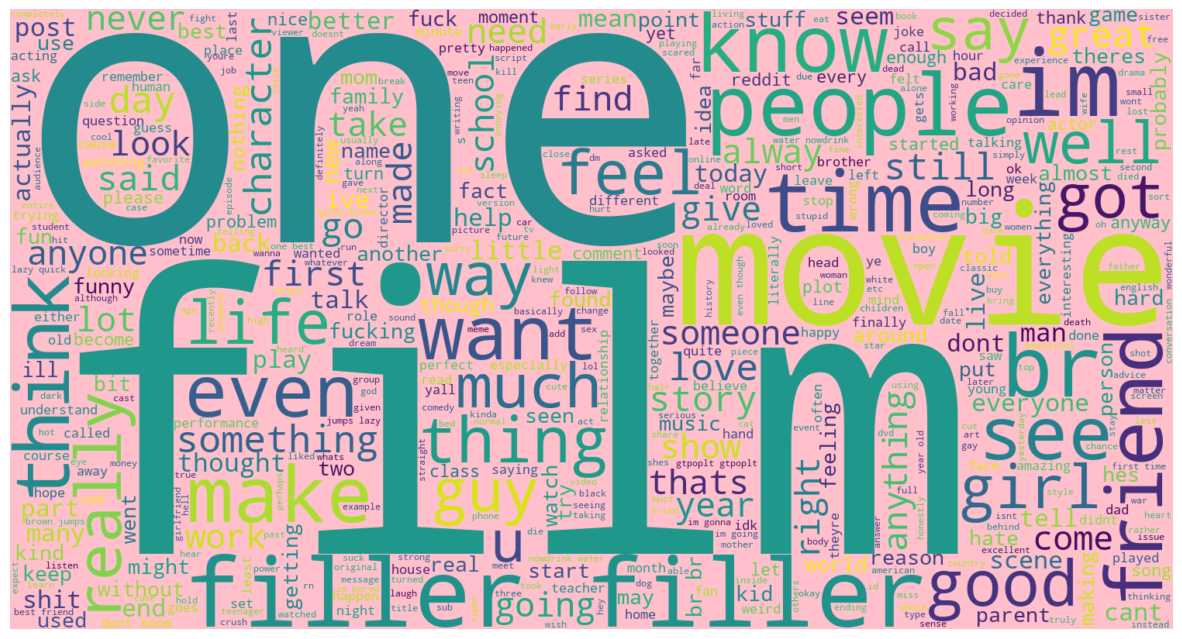

In [125]:
####Create wordcloud for non-mental health texts####
text = " ".join(mental_text[mental_text['label'] == 0]['text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="pink", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

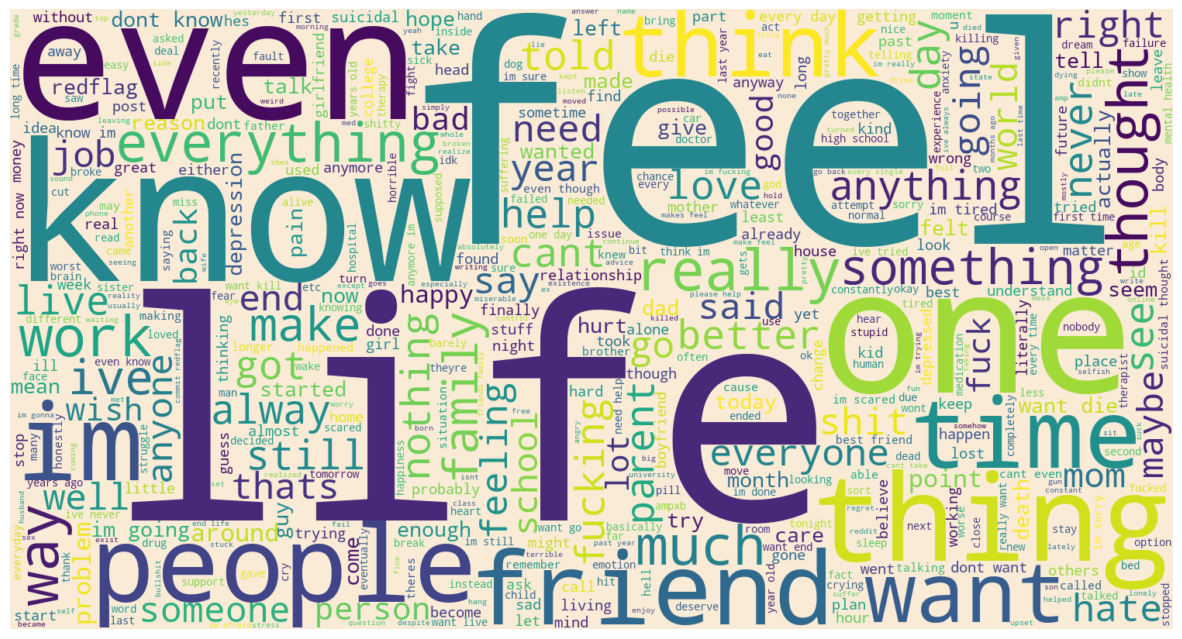

In [126]:
####Creat wordcloud for mental health text####
text = " ".join(mental_text[mental_text['label'] == 1]['text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="antiquewhite", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Shuffeling  and sampling

In [127]:
##shuffle data and save in a different dataframe
mental_text = shuffle(mental_text)
shuffled_mental_text = mental_text.sample(frac=0.22, replace=False, random_state=1)

In [128]:
shuffled_mental_text

,text,label
1273,tips losing weight hello rteenagers ive trying...,0
24453,fucking hate desk sometimes reason sits angle ...,0
5239,lost fucking mind getting worsei dont fit any...,1
741,muchive rough couple months recently lost mom ...,1
13222,here school crowded hallway girls front refus...,0
...,...,...
27692,would appreciate suggestions alternative rredf...,1
7298,one contribute universe committing redflagwhat...,1
14641,anyone else boat im dont personality people li...,0
25994,reached breaking point im fed upim done cant t...,1


### Data Pre-processing

In [129]:
# =====================Function to handle Pre-processing======================
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize text into individual words
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # print(tokens)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [130]:
shuffled_mental_text['cleaned_text'] = shuffled_mental_text['text'].apply(preprocess_text)

In [131]:
shuffled_mental_text

,text,label,cleaned_text
1273,tips losing weight hello rteenagers ive trying...,0,tip losing weight hello rteenagers ive trying ...
24453,fucking hate desk sometimes reason sits angle ...,0,fucking hate desk sometimes reason sits angle ...
5239,lost fucking mind getting worsei dont fit any...,1,lost fucking mind getting worsei dont fit anyw...
741,muchive rough couple months recently lost mom ...,1,muchive rough couple month recently lost mom l...
13222,here school crowded hallway girls front refus...,0,school crowded hallway girl front refuse move ...
...,...,...,...
27692,would appreciate suggestions alternative rredf...,1,would appreciate suggestion alternative rredfl...
7298,one contribute universe committing redflagwhat...,1,one contribute universe committing redflagwhat...
14641,anyone else boat im dont personality people li...,0,anyone else boat im dont personality people li...
25994,reached breaking point im fed upim done cant t...,1,reached breaking point im fed upim done cant t...


In [132]:
# ===================Load preprocess text and labels================
x = shuffled_mental_text['cleaned_text']
y = shuffled_mental_text['label']

In [133]:
y.unique()

array([0, 1], dtype=int64)

In [134]:
# Split the data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [135]:
# ===========Convert preprocessed text to numerical values=================
vectorizer = TfidfVectorizer()
x_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)


### Train model

In [136]:
# =================Train the model===================
model = SVC(kernel='linear', probability=True)
model.fit(x_train_features, y_train)

SVC(kernel='linear', probability=True)

In [137]:
# ==================save the vetorizer and the model===============
joblib.dump(vectorizer, 'models/vectorizer.pkl')
joblib.dump(model, 'models/svm_model.pkl')

['models/svm_model.pkl']

### Model Evaluation

In [138]:
# =================Model eveluation====================
y_pred = model.predict(X_test_features)
class_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       616
           1       0.90      0.89      0.89       615

    accuracy                           0.89      1231
   macro avg       0.89      0.89      0.89      1231
weighted avg       0.89      0.89      0.89      1231



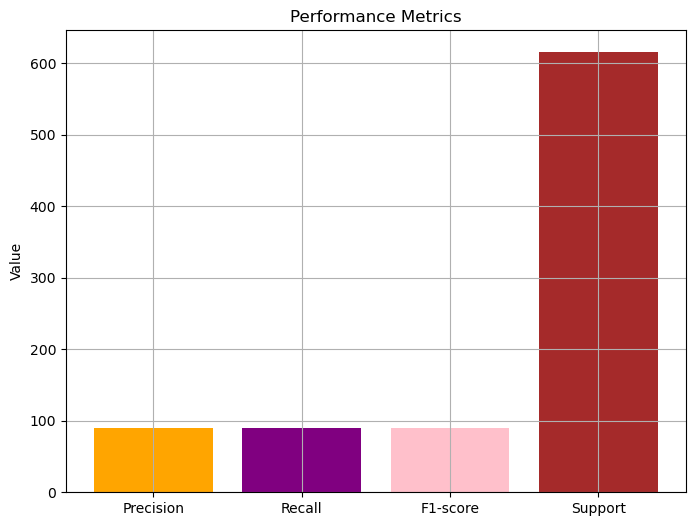

In [139]:
# Extract precision, recall, f1-score, and support values
precision = class_report['1']['precision']*100
recall = class_report['1']['recall']*100
f1_score = class_report['1']['f1-score']*100
support = class_report['1']['support']

# Plot the metrics
plt.figure(figsize=(8, 6))
plt.bar(['Precision', 'Recall', 'F1-score', 'Support'], [precision, recall, f1_score, support], 
        color=['orange', 'purple', 'pink', 'brown'])
plt.title('Performance Metrics')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [140]:
### Prediction Probability and Label Classes

In [141]:
# Get the prediction probabilities for each class
prediction_probabilities = model.predict_proba(X_test_features)

# Get the class labels
class_labels = model.classes_

# Combine the class labels and their corresponding probabilities into a dictionary
prediction_results = {class_labels[i]: prediction_probabilities[0][i] for i in range(len(class_labels))}

In [142]:
# Print the prediction results with percentages
print("Prediction probabilities:")
for label, probability in prediction_results.items():
    print(f"{label}: {probability * 100:.2f}%")

Prediction probabilities:
0: 56.88%
1: 43.12%


In [143]:
# =============Confusion Matrix=================
conf_matrix = confusion_matrix(y_test, y_pred)

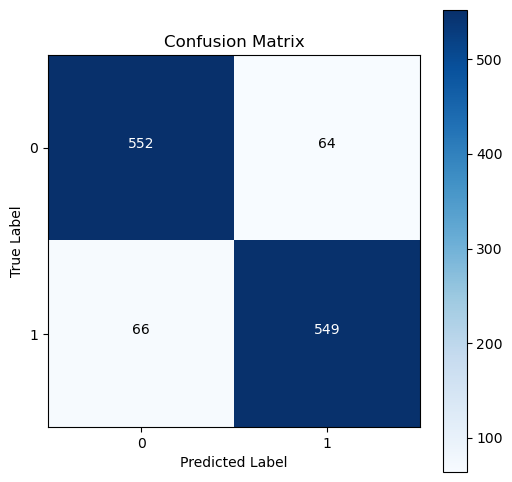

In [144]:
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

thresh = conf_matrix.max() / 2.0
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()

#Plot the ROC Curve and Precision-recall Curve

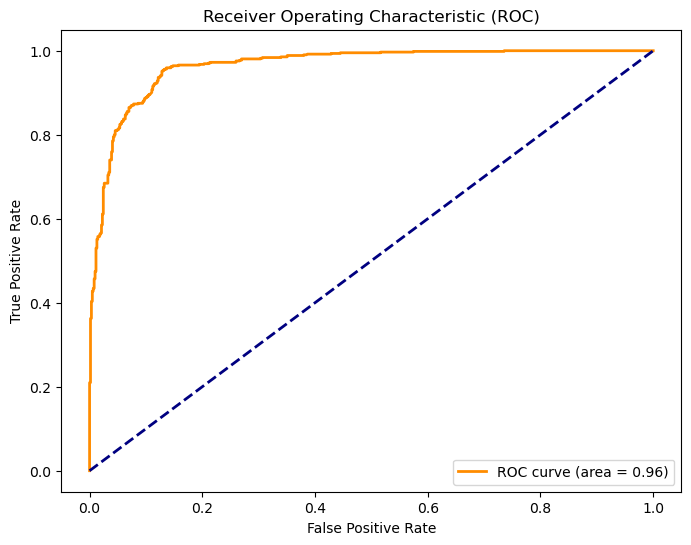

In [145]:
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities[:,1])

# Compute the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, prediction_probabilities[:,1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

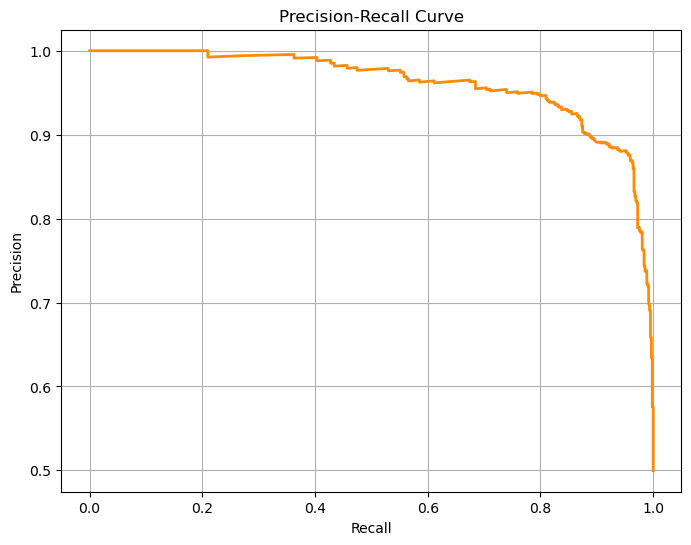

In [146]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, prediction_probabilities[:,1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(visible=True)
plt.show()

In [147]:
# ==============Use the trained model for prediction on new data==============

### Real time Testing of the model using the Text transcript

In [148]:
#TESTING WITH THE FIRST TRANSCRIPT

In [149]:
pwd

'C:\\Users\\ozors\\OneDrive - University of Derby\\Big Data\\Assigment\\Res\\PROJECT WORK'

In [150]:
#  ==================Testing the model with the transcript==============
# Load the transcript data
with open("ALL\\Alan Kurtz Transcript 1.txt", 'r') as file:
    transcript_text = file.read()

In [151]:
transcript_text

'Transcript of 1st Session between Charles Balis, M.D. and Mr. Alan Kurtz, Friday, August 8, 1997 at 3:00 pm.\t \t \n\n     \n Mr. Kurtz:            Mr...uh, Doctor Balis?       \n\n\n\n Dr. Balis:            Yes. You must be Mr. Kurtz.       \n\n\n\n Mr. Kurtz:            Yes. Thanks for seeing me. Is there...hmm. Is there a particular seat?       \n\n\n\n Dr. Balis:            Please sit anywhere you like.       \n\n\n\n Mr. Kurtz:            You must do group therapy--all these chairs. Anyway, as I said on the phone, I\'m looking for something fairly specific out of all this. I\'m not looking for a long-term commitment.       \n\n\n\n Dr. Balis:            I see that makes you smile.       \n\n\n\n Mr. Kurtz:            What? Oh. Well, commitment is why I\'m here. I\'m curious about why my relationships don\'t last for more than a few months. I\'ve discussed it with friends, but they don\'t seem to have these issues. So I figured I can let SII pay to bounce things off you for a few 

In [152]:
# ==================Preprocess the transcript text=============
preprocessed_text = preprocess_text(transcript_text)

In [153]:
# ==================Load vectorizer and the model================
vectorizer = joblib.load('models/vectorizer.pkl')
svm_model = joblib.load('models/svm_model.pkl')

In [154]:
# ==================Preprocess the transcript text using the saved vectorizer model=================
X_test_features = vectorizer.transform([preprocessed_text])

In [155]:
# ===============Get the predicted class=================
predicted_class = model.predict(X_test_features)[0]

In [156]:
predicted_class

0

In [157]:
prediction_probabilities = svm_model.predict_proba(X_test_features)[0]

In [158]:
# class 0 = no sign of mental issues and 1 = sign of mental issues detected
print(f'Predicted class: {predicted_class}\nProbability: {max(prediction_probabilities)*100:.2f}')

Predicted class: 0
Probability: 77.01


In [159]:
if predicted_class == 0:
    print('No mental issues found')
    # ==========Classify levels of mental issues============
elif max(prediction_probabilities) <= 0.70:
        print('Anxiety')
elif max(prediction_probabilities) <= 0.75:
        print('Post traumatic stress disorder')
elif max(prediction_probabilities) <= 0.89:
        print('Depression.It can lead to thought of committing suicide')
elif max(prediction_probabilities) >= 0.90:
        print('Schizophrenia. This can lead to thought of commiting suicide ')
else:
            print('other mental health condition')

No mental issues found


In [160]:
#TESTING WITH THE SECOND TRANSCRIPT####

In [161]:
pwd

'C:\\Users\\ozors\\OneDrive - University of Derby\\Big Data\\Assigment\\Res\\PROJECT WORK'

In [162]:
#Transcript 2
# Load the transcript data
with open("ALL\Kester Langford Transcript   2.txt", 'r') as file:
    transcript_text2 = file.read()

In [163]:
transcript_text2

'ï»¿\n\nTranscript of 2nd Session between Charles Balis, M.D. and Mr. Kester Langford, Tuesday, July 8, 1997 at 1:00pm.\n\n\n\n               Mr. Langford:   Hello, Dr. Balis. \n\n                  Dr. Balis:   Hello, Mr. Langford. \n\n               Mr. Langford:   Dr. Balis, I never did ask you if you mind my calling you "Doc." \n\n                  Dr. Balis:   No, that\'s perfectly fine with me. Thanks for asking. \n\n               Mr. Langford:   I don\'t remember whether you called me Mr. Langford or Kester\n                                last time, but I prefer Kester.\n                                \n\n                  Dr. Balis:   I\'d be glad to call you Kester. \n\n               Mr. Langford:   Well, I think we\'re off to a good start. \n\n                  Dr. Balis:   Good. \n\n               Mr. Langford:   I\'ve brought some of my marks to show you but all of the images\n                                are turned towards the wall as you can see. Still, having them\

In [164]:
# ==================Preprocess the transcript text=============
preprocessed_text2 = preprocess_text(transcript_text2)

In [165]:
# ==================Load vectorizer and the model================
vectorizer = joblib.load('models/vectorizer.pkl')
svm_model = joblib.load('models/svm_model.pkl')

In [166]:
X_test_features = vectorizer.transform([preprocessed_text2])

In [167]:
predicted_class2 = model.predict(X_test_features)[0]

In [168]:
predicted_class2

0

In [169]:
prediction_probabilities2 = svm_model.predict_proba(X_test_features)[0]

In [170]:
# class 0 = no sign of mental issues and 1 = sign of mental issues detected
print(f'Predicted class2: {predicted_class2}\nProbability: {max(prediction_probabilities2)*100:.2f}')

Predicted class2: 0
Probability: 73.57


In [171]:
if predicted_class2 == 0:
    print('No mental issues found')
    # ==========Classify levels of mental issues============
elif max(prediction_probabilities2) <= 0.70:
        print('Anxiety')
elif max(prediction_probabilities2) <= 0.75:
        print('Post traumatic stress disorder')
elif max(prediction_probabilities2) <= 0.89:
        print('Depression.It can lead to thought of committing suicide')
elif max(prediction_probabilities2) >= 0.90:
        print('Schizophrenia. This can lead to thought of commiting suicide ')
else:
            print('other mental health condition')

No mental issues found


In [172]:
#TESTING WITH THE THIRD TRANSCRIPT####

In [173]:
with open ("ALL\Sharon Lough Transcript  2.txt", "r") as file:
    transcript_text3=file.read()

In [174]:
transcript_text3

'ï»¿\n\nTranscript of 2nd Session between Charles Balis, M.D. and Ms. Sharon Lough, Friday, November 14, 1997 at 10:00 am.\t \t \n\n     \n\n\n Ms. Lough:            Hi.       \n\n\n\n Dr. Balis:            How are you today?       \n\n\n\n Ms. Lough:            I\'m pissed off.       \n\n\n\n Dr. Balis:            What\'s the matter?       \n\n\n\n Ms. Lough:            I had a really bad week at work. My boss yelled at me in front of the entire department Tuesday, then today, he reprimanded me again in front of everyone. Isn\'t there some rule of management which says you\'re not supposed to yell at a person in front of her co-workers?       \n\n\n\n Dr. Balis:            What happened?       \n\n\n\n Ms. Lough:            There were some important documents that needed to be sent by messenger. That dumbshit, Celeste--the dingbat secretary I told you about--she screwed it up and put the wrong address on the label. She\'s done it several times before. These are confidential documents,

In [175]:
# ==================Preprocess the transcript text=============
preprocessed_text3 = preprocess_text(transcript_text3)

In [176]:
# ==================Load vectorizer and the model================
vectorizer = joblib.load('models/vectorizer.pkl')
svm_model = joblib.load('models/svm_model.pkl')

In [177]:
X_test_features = vectorizer.transform([preprocessed_text3])

In [178]:
predicted_class3 = model.predict(X_test_features)[0]

In [179]:
predicted_class3

1

In [180]:
prediction_probabilities3 = svm_model.predict_proba(X_test_features)[0]

In [181]:
# class 0 = no sign of mental issues and 1 = sign of mental issues detected
print(f'Predicted class3: {predicted_class3}\nProbability: {max(prediction_probabilities3)*100:.2f}')

Predicted class3: 1
Probability: 78.20


In [182]:
if predicted_class3 == 0:
    print('No mental issues found')
    # ==========Classify levels of mental issues============
elif max(prediction_probabilities3) <= 0.70:
        print('Anxiety')
elif max(prediction_probabilities3) <= 0.75:
        print('Post traumatic stress disorder')
elif max(prediction_probabilities3) <= 0.89:
        print('Depression.It can lead to thought of committing suicide')
elif max(prediction_probabilities3) >= 0.90:
        print('Schizophrenia. This can lead to thought of commiting suicide ')
else:
            print('other mental health condition')

Depression.It can lead to thought of committing suicide


In [183]:
#TESTING WITH THE FOURTH TRANSCRIPT####

In [184]:
##fourth
with open("ALL\Eliza RavenTranscript 2.txt", "r") as file:
    transcript_text4= file.read()

In [185]:
transcript_text4

'Transcript of 2nd Session between Charles Balis, M.D. and\nMs. Eliza Raven, Tuesday, February 18, 1997 at 12 pm.\n\n       Dr. Balis:   Hello Eliza.\n\n     Ms. Raven:     Good afternoon Dr. Balis. I hope you\n                    received my letter?\n\n       Dr. Balis:   Yes I did.\n\n     Ms. Raven:     Very good. Well, here is the list Luke\n                    provided me. I hope that you don\'t wish to\n                    stick to it, because I surely do not.\n\n       Dr. Balis:   Let\'s see: "The Weather, Sports, Work,\n                    Music and your band, the News, Animals,\n                    and your Wedding Plans." I don\'t know, I\n                    think I might like discussing the weather.\n\n     Ms. Raven:     Good heavens Doctor! You\'re not serious!\n\n       Dr. Balis:   No I\'m not. Why don\'t we forget about\n                    Luke\'s list right now and just talk about\n                    what you want to talk about.\n\n     Ms. Raven:     First off, le

In [186]:
# ==================Preprocess the transcript text=============
preprocessed_text4 = preprocess_text(transcript_text4)

In [187]:
preprocessed_text4 = preprocess_text(transcript_text4)

In [188]:
# ==================Load vectorizer and the model================
vectorizer = joblib.load('models/vectorizer.pkl')
svm_model = joblib.load('models/svm_model.pkl')

In [189]:
X_test_features = vectorizer.transform([preprocessed_text3])

In [190]:
predicted_class4 = model.predict(X_test_features)[0]

In [191]:
predicted_class4

1

In [192]:
prediction_probabilities4 = svm_model.predict_proba(X_test_features)[0]

In [193]:
# class 0 = no sign of mental issues and 1 = sign of mental issues detected
print(f'Predicted class4: {predicted_class4}\nProbability: {max(prediction_probabilities4)*100:.2f}')

Predicted class4: 1
Probability: 78.20


In [194]:
if predicted_class4 == 0:
    print('No mental issues found')
    # ==========Classify levels of mental issues============
elif max(prediction_probabilities4) <= 0.70:
        print('Anxiety')
elif max(prediction_probabilities4) <= 0.75:
        print('Post traumatic stress disorder')
elif max(prediction_probabilities4) <= 0.89:
        print('Depression.It can lead to thought of committing suicide')
elif max(prediction_probabilities4) >= 0.90:
        print('Schizophrenia. This can lead to thought of commiting suicide ')
else:
            print('other mental health condition')

Depression.It can lead to thought of committing suicide


In [195]:
# Load the fifth transcript data
with open("ALL\Sarah Wright Transcript.txt", 'r') as file:
    transcript_text5= file.read()

In [196]:
transcript_text5

'Transcript of 13th Session between Charles Balis, M.D. and\nMs. Sarah Wright, Monday, January 13, 1997 at 2:00 pm.\n\n       Dr. Balis:   Hi Sarah. It\'s good to see you.\n\n     Ms. Wright:    Hi Doc. It\'s good to be seen. I\'m sorry\n                    about canceling our appointment last\n                    week.\n\n       Dr. Balis:   It\'s okay. Was there anything wrong?\n\n     Ms. Wright:    Five people, the flu, one bathroom.\n\n       Dr. Balis:   I see. I hope everyone is better now.\n\n     Ms. Wright:    Most everyone. Melissa is still home sick.\n                    School started last week. She went two\n                    days and has been in bed since.\n\n       Dr. Balis:   Have you taken her to the doctor?\n\n     Ms. Wright:    I called the doctor\'s office and they told\n                    me it sounded like what everyone else\n                    had. They called in a prescription for her,\n                    so hopefully she\'ll be back on her feet\n       

In [197]:
# ==================Preprocess the transcript text=============
preprocessed_text5 = preprocess_text(transcript_text5)

In [198]:
# ==================Load vectorizer and the model================
vectorizer = joblib.load('models/vectorizer.pkl')
svm_model = joblib.load('models/svm_model.pkl')

In [199]:
X_test_features = vectorizer.transform([preprocessed_text5])

In [200]:
predicted_class5 = model.predict(X_test_features)[0]

In [201]:
predicted_class5

1

In [202]:
prediction_probabilities5 = svm_model.predict_proba(X_test_features)[0]

In [203]:
# class 0 = no sign of mental issues and 1 = sign of mental issues detected
print(f'Predicted class5: {predicted_class5}\nProbability: {max(prediction_probabilities5)*100:.2f}')

Predicted class5: 1
Probability: 68.36


In [204]:
if predicted_class5 == 0:
    print('No mental issues found')
    # ==========Classify levels of mental issues============
elif max(prediction_probabilities5) <= 0.70:
        print('Anxiety')
elif max(prediction_probabilities5) <= 0.75:
        print('Post traumatic stress disorder')
elif max(prediction_probabilities5) <= 0.89:
        print('Depression.It can lead to thought of committing suicide')
elif max(prediction_probabilities5) >= 0.90:
        print('Schizophrenia. This can lead to thought of commiting suicide ')
else:
            print('other mental health condition')

Anxiety


In [205]:
#SIXTH TRANSCRIPT TEXT

In [206]:
pwd

'C:\\Users\\ozors\\OneDrive - University of Derby\\Big Data\\Assigment\\Res\\PROJECT WORK'

In [207]:
# Load the sixth transcript data
with open(r"ALL\Nicole Ulreich Transcript.txt") as file:
    transcript_text6= file.read()

In [208]:
  transcript_text6

'Transcript of 1st Session between Charles Balis, M.D. and\nMs. Nicole Ulreich, Monday, March 30, 1998 at 2:00 pm.\n\n     Ms. Ulreich:   Hi. You must be Doctor Balis.\n\n       Dr. Balis:   Hello. You must be Nicole.\n\n     Ms. Ulreich:   Yeah. Um, I\'m kind of nervous. This is the\n                    first time I\'ve ever been to a psycho-\n                    doctor.\n\n       Dr. Balis:   Well, there\'s nothing to worry about. I\n                    won\'t bite.\n\n     Ms. Ulreich:   I kind of figured that.\n\n       Dr. Balis:   Good. Why don\'t you sit down and we\'ll\n                    talk for awhile.\n\n     Ms. Ulreich:   Fine. But there\'s nothing wrong with my\n                    life. It\'s just peachy.\n\n       Dr. Balis:   Oh? Then why are you here?\n\n     Ms. Ulreich:   My way overprotective mother sent me\n                    here. She thinks I have a drug problem.\n\n       Dr. Balis:   Does she have any reason to think that?\n\n     Ms. Ulreich:   My friend A

In [209]:
# ==================Preprocess the transcript text=============
preprocessed_text6= preprocess_text(transcript_text6)

In [210]:
 #==================Load vectorizer and the model================
vectorizer = joblib.load('models/vectorizer.pkl')
svm_model = joblib.load('models/svm_model.pkl')

In [211]:
X_test_features = vectorizer.transform([preprocessed_text6])

In [212]:
predicted_class6 = model.predict(X_test_features)[0]

In [213]:
predicted_class6

1

In [214]:
prediction_probabilities6 = svm_model.predict_proba(X_test_features)[0]

In [215]:
# class 0 = no sign of mental issues and 1 = sign of mental issues detected
print(f'Predicted class6: {predicted_class6}\nProbability: {max(prediction_probabilities6)*100:.2f}')

Predicted class6: 1
Probability: 71.67


In [216]:
if predicted_class6 == 0:
    print('No mental issues found')
    # ==========Classify levels of mental issues============
elif max(prediction_probabilities6) <= 0.70:
        print('Anxiety')
elif max(prediction_probabilities6) <= 0.75:
        print('Post traumatic stress disorder')
elif max(prediction_probabilities6) <= 0.89:
        print('Depression.It can lead to thought of committing suicide')
elif max(prediction_probabilities6) >= 0.90:
        print('Schizophrenia. This can lead to thought of commiting suicide ')
else:
            print('other mental health condition')

Post traumatic stress disorder
